In [ ]:
import requests, zipfile  #接受web資料/讀取zip file
from io import StringIO   
import io                 #讀取檔案

import pandas as pd
import numpy as np

url='http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
r=requests.get(url).content
auto=pd.read_csv(io.StringIO(r.decode('utf-8')), header =None)
auto.columns=['symboling', 'normalized_losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors','body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height','curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg','price']

print('汽車資料的形式：{}'.format(auto.shape))
auto.head()

汽車資料的形式：(205, 26)


,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
auto1=auto[['price', 'horsepower', 'width', 'height']]
auto1.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [ ]:
auto1 = auto1.replace('?', np.nan).dropna()
print('汽車資料的形式：{}'.format(auto1.shape))
print('資料類型的確認(型別轉換前)：\n{}\n'.format(auto1.dtypes))


汽車資料的形式：(199, 4)
資料類型的確認(型別轉換前)：
price          object
horsepower     object
width         float64
height        float64
dtype: object



In [ ]:
auto1 = auto1.assign(price=pd.to_numeric(auto1.price))
auto1 = auto1.assign(horsepower=pd.to_numeric(auto1.horsepower))
print('資料類型的確認(型別轉換後)：\n{}\n'.format(auto1.dtypes))


資料類型的確認(型別轉換後)：
price           int64
horsepower      int64
width         float64
height        float64
dtype: object



In [ ]:
auto1.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#step 1. 選擇模型
model=LinearRegression()
#Step 2. 選擇variable/Target
X = auto1.drop('price', axis=1)
Y = auto1['price']
#Step 3.分出訓練資料與測試資料
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
#Step 4.將訓練資料置入machine learning
model.fit(X_train, Y_train)
#Step 5.以測試資料確認模型的泛用性
print('決定係數(train):{:.3f}'.format(model.score(X_train, Y_train)))
print('決定係數(test):{:.3f}'.format(model.score(X_test, Y_test)))

print('\n回歸係數\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('截距: {:.3f}'.format(model.intercept_))


決定係數(train):0.733
決定係數(test):0.737

回歸係數
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
截距: -128409.046


Practice_1
1. 查詢變數增加法、變數減少法、步進法
2. price為目標變數，使用width/engine-size作為variable
3. 使用其他變數

In [ ]:
auto2=auto[['price', 'engine-size', 'width']]
auto2.isin(['?']).sum()
auto2 = auto2.replace('?', np.nan).dropna()
print('汽車資料的形式：{}'.format(auto2.shape))
print('資料類型的確認：\n{}\n'.format(auto2.dtypes))

model=LinearRegression()
X = auto2.drop('price', axis=1)
Y = auto2['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
model.fit(X_train, Y_train)
print('決定係數(train):{:.3f}'.format(model.score(X_train, Y_train)))
print('決定係數(test):{:.3f}'.format(model.score(X_test, Y_test)))

print('\n回歸係數\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('截距: {:.3f}'.format(model.intercept_))

汽車資料的形式：(201, 3)
資料類型的確認：
price           object
engine-size      int64
width          float64
dtype: object

決定係數(train):0.783
決定係數(test):0.778

回歸係數
engine-size     109.526787
width          1261.735518
dtype: float64
截距: -84060.643


In [ ]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
r=requests.get(url).content
adult=pd.read_csv(io.StringIO(r.decode('utf-8')), header =None)
adult.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status','occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country', 'flg-50K']

print('資料的形式：{}'.format(adult.shape))
print('遺漏的數量：{}'.format(adult.isnull()))
print('遺漏的數量：{}'.format(adult.isnull().sum()))
print('遺漏的數量：{}'.format(adult.isnull().sum().sum()))

adult.head()

資料的形式：(32561, 15)
遺漏的數量：         age  workclass  fnlwgt  education  education-num  marital-status  \
0      False      False   False      False          False           False   
1      False      False   False      False          False           False   
2      False      False   False      False          False           False   
3      False      False   False      False          False           False   
4      False      False   False      False          False           False   
...      ...        ...     ...        ...            ...             ...   
32556  False      False   False      False          False           False   
32557  False      False   False      False          False           False   
32558  False      False   False      False          False           False   
32559  False      False   False      False          False           False   
32560  False      False   False      False          False           False   

       occupation  relationship   race    sex  capi

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [ ]:
adult['flg_flg'] = adult['flg-50K'].map(lambda x:1 if x == ' >50K' else 0)
adult.groupby('flg_flg').size()

flg_flg
0    24720
1     7841
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#step 1. 選擇模型
model=LogisticRegression()
#Step 2. 選擇variable/Target
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
Y = adult['flg_flg']
#Step 3.分出訓練資料與測試資料
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
#Step 4.將訓練資料置入machine learning
model.fit(X_train, Y_train)
#Step 5.以測試資料確認模型的泛用性
print('準確度(train):{:.3f}'.format(model.score(X_train, Y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test, Y_test)))

print('回歸係數:', model.coef_)
print('勝算比:', np.exp(model.coef_))

準確度(train):0.797
準確度(test):0.798
回歸係數: [[-1.18545968e-02 -4.37932054e-06 -2.77432658e-03  3.27384955e-04
   7.53237842e-04]]
勝算比: [[0.98821539 0.99999562 0.99722952 1.00032744 1.00075352]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#step 1. 選擇模型
model=LogisticRegression()
#Step 2. 選擇variable/Target
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
Y = adult['flg_flg']
#Step 3.分出訓練資料與測試資料並進行標準化處理
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#Step 4.將訓練資料置入machine learning
model.fit(X_train_std, Y_train)
#Step 5.以測試資料確認模型的泛用性
print('準確度(train):{:.3f}'.format(model.score(X_train_std, Y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test_std, Y_test)))

print('回歸係數:', model.coef_)
print('勝算比:', np.exp(model.coef_))

準確度(train):0.811
準確度(test):0.810
回歸係數: [[0.53285119 0.02543326 0.83916776 2.28547601 0.28655877]]
勝算比: [[1.7037832  1.02575944 2.31444001 9.83036447 1.33183644]]


Practice_2
1. 使用breast cancer dataset，使用cancer.data為variable，使用cancer.target為target

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()##將數據集賦值給iris變數

print('breast_cancer數據集的長度爲：',len(cancer))
print('breast_cancer數據集的型別爲：',type(cancer))

cancer_data = cancer['data']
print('breast_cancer數據集的數據爲：','\n',cancer_data)

cancer_target = cancer['target'] ## 取出數據集的標籤
print('breast_cancer數據集的標籤爲：\n',cancer_target)

cancer_names = cancer['feature_names'] ## 取出數據集的特徵名
print('breast_cancer數據集的特徵名爲：\n',cancer_names)

cancer_desc = cancer['DESCR'] ## 取出數據集的描述資訊
print('breast_cancer數據集的描述資訊爲：\n',cancer_desc)

breast_cancer數據集的長度爲： 8
breast_cancer數據集的型別爲： <class 'sklearn.utils.Bunch'>
breast_cancer數據集的數據爲： 
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
breast_cancer數據集的標籤爲：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 

In [ ]:
import pandas as pd

X = pd.DataFrame(cancer['data'])
X.columns = cancer['feature_names']
Y = pd.DataFrame(cancer['target'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
model.fit(X_train, Y_train)
print('準確度(train):{:.3f}'.format(model.score(X_train, Y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test, Y_test)))

print('回歸係數:', model.coef_)
print('勝算比:', np.exp(model.coef_))

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model.fit(X_train_std, Y_train)
print('準確度(train):{:.3f}'.format(model.score(X_train_std, Y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test_std, Y_test)))

print('回歸係數:', model.coef_)
print('勝算比:', np.exp(model.coef_))

準確度(train):0.968
準確度(test):0.954
回歸係數: [[ 1.40889569  0.08092908  0.14678877  0.00208905 -0.047464   -0.24760592
  -0.36639911 -0.1661669  -0.13064564 -0.01020131  0.05470646  0.33431028
   0.24853421 -0.07979705 -0.00408257 -0.04479238 -0.07606345 -0.02513714
  -0.03037706 -0.00325497  1.49831845 -0.23067893 -0.29499756 -0.0262212
  -0.08164579 -0.69501851 -0.99003392 -0.33335938 -0.31097496 -0.06647544]]
勝算比: [[4.09143471 1.084294   1.15810931 1.00209123 0.9536448  0.78066753
  0.69322607 0.84690488 0.87752868 0.98985055 1.05623052 1.39697653
  1.28214468 0.92330371 0.99592575 0.95619599 0.92675741 0.97517617
  0.97007968 0.99675032 4.47415923 0.79399436 0.74453341 0.97411959
  0.92159834 0.49906521 0.37156409 0.71651265 0.73273223 0.93568589]]
準確度(train):0.989
準確度(test):0.975
回歸係數: [[-0.21933265 -0.54337551 -0.21595604 -0.29393727 -0.06545003  0.19202963
  -0.65545013 -0.85099899 -0.44681781  0.09568111 -1.31471141 -0.02740941
  -0.85730214 -0.75620945  0.32930751  0.8361995   0.020

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

In [ ]:
auto1.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = auto1.drop('price', axis=1)
Y = auto1['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

linear = LinearRegression()
ridge = Ridge(random_state=0)

for model in [linear,ridge]:
  model.fit(X_train, Y_train)
  print('{}(train):{:.6f}'.format(model.__class__.__name__ , model.score(X_train, Y_train)))
  print('{}(train):{:.6f}'.format(model.__class__.__name__ , model.score(X_test, Y_test)))


LinearRegression(train):0.733358
LinearRegression(train):0.737069
Ridge(train):0.733355
Ridge(train):0.737768
LinearRegression


Practice_3

1. price為目標變數，使用width/engine-size作為variable，並使用LASSO評估並調整參數

In [ ]:
from sklearn.linear_model import Lasso

auto2=auto[['price', 'engine-size', 'width']]
auto2.isin(['?']).sum()
auto2 = auto2.replace('?', np.nan).dropna()
print('汽車資料的形式：{}'.format(auto2.shape))
print('資料類型的確認：\n{}\n'.format(auto2.dtypes))

linear=LinearRegression()
lasso1 = Lasso(alpha = 1, random_state=0)
lasso2 = Ridge(alpha = 100, random_state=0)

models = {
    "Linear Regression": linear,
    "Lasso method 1": lasso1,
    "Lasso method 2": lasso2
}

X = auto2.drop('price', axis=1)
Y = auto2['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

scores={}

for model_name, model in models.items():
  model.fit(X_train, Y_train)
  print(model_name,'(train):{:.6f}'.format(model.score(X_train, Y_train)))
  print(model_name,'(train):{:.6f}'.format(model.score(X_test, Y_test)))
  scores[(model_name, 'train')] = model.score(X_train, Y_train)
  scores[(model_name, 'test')] = model.score(X_train, Y_train)

pd.Series(scores).unstack()

汽車資料的形式：(201, 3)
資料類型的確認：
price           object
engine-size      int64
width          float64
dtype: object

Linear Regression (train):0.783189
Linear Regression (train):0.778292
Lasso method 1 (train):0.783189
Lasso method 1 (train):0.778318
Lasso method 2 (train):0.776713
Lasso method 2 (train):0.791679


,test,train
Lasso method 1,0.783189,0.783189
Lasso method 2,0.776713,0.776713
Linear Regression,0.783189,0.783189


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
r = requests.get(url).content
mushroom = pd.read_csv(io.StringIO(r.decode('utf-8')), header =None)
mushroom.columns = ['classes','cap_surface','cap_color','odor','bruises','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_root','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']
mushroom.head()


,classes,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_root,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
print('資料的形式：{}'.format(mushroom.shape))
print('遺漏的數量：{}'.format(mushroom.isnull().sum().sum()))

資料的形式：(8124, 23)
遺漏的數量：0


In [ ]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)
mushroom_dummy.head()

,gill_color_b,gill_color_n,gill_attachment_a,gill_attachment_c,gill_attachment_f,gill_attachment_l,gill_attachment_m,gill_attachment_n,gill_attachment_p,gill_attachment_s,...,odor_p,odor_r,odor_u,odor_w,odor_y,cap_color_f,cap_color_g,cap_color_s,cap_color_y,flg
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
mushroom_dummy.groupby(['cap_color_y','flg'])['flg'].count().unstack()

flg,0,1
cap_color_y,,
0,2704,2176
1,1504,1740


判斷分佈條件優劣，可以使用不純度指標熵(entropy)

1.0
0.011407757737461138


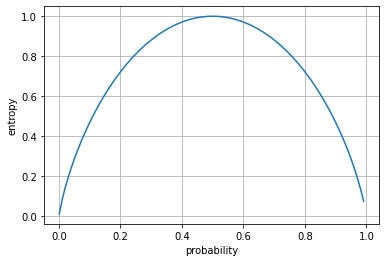

In [ ]:
import matplotlib.pyplot as plt

print(-((0.5*np.log2(0.5)) + 0.5*np.log2(0.5))) #在這個指標分類下，classes 0/1各自50%
print(-((0.001*np.log2(0.001)) + 0.999*np.log2(0.999))) #在這個指標分類下，classes 0/1各自為0.1%和99.9%

def calc_entropy(p):
  return -((p*np.log2(p)) + (1-p)*np.log2(1-p))

p = np.arange(0.001,0.999,0.01)
plt.plot(p,calc_entropy(p))
plt.xlabel('probability')
plt.ylabel('entropy')
plt.grid(True)

In [ ]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

In [ ]:
entropy_init = -((0.518*np.log2(0.518)) + 0.482*np.log2(0.482))
print('毒菇資料熵的初始值：{:.3f}'.format(entropy_init))

毒菇資料熵的初始值：0.999


In [ ]:
mushroom_dummy.groupby(['cap_color_y','flg'])['flg'].count().unstack()

flg,0,1
cap_color_y,,
0,2704,2176
1,1504,1740


In [ ]:
p1 = 2176/(2704+2176) #cap_color不為y時的毒菇機率
p2 = 1740/(1504+1740) #cap_color為y時的毒菇機率
entropy_p1 = calc_entropy(p1) 
entropy_p2 = calc_entropy(p2)

entropy_after = entropy_p1*(2704+2176)/8124 + entropy_p2*(1504+1740)/8124
print('資料分割後的平均熵：{:.3f}'.format(entropy_after))
print('資料分割後的資訊獲利：{:.3f}'.format(entropy_init - entropy_after))

資料分割後的平均熵：0.993
資料分割後的資訊獲利：0.006


Practice_4
1. 查詢Gini impurity與classification error

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = mushroom_dummy.drop('flg', axis=1)
Y = mushroom_dummy['flg']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=0)
model.fit(X_train, Y_train)

print('準確度(train):{:.3f}'.format(model.score(X_train, Y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test, Y_test)))

準確度(train):0.988
準確度(test):0.990


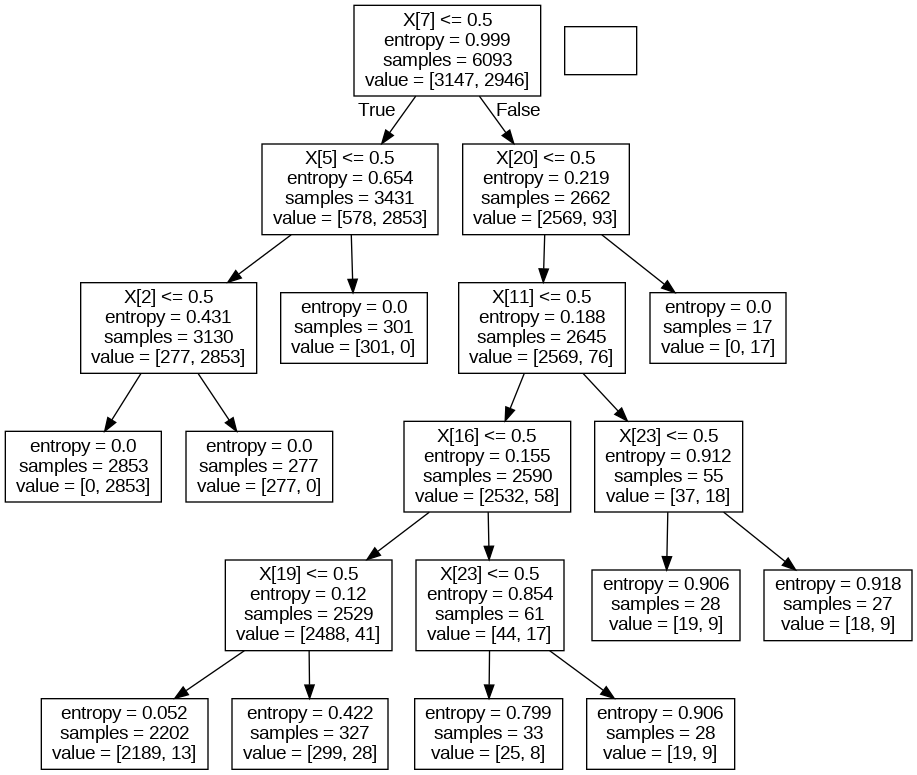

In [ ]:
from sklearn import tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Practice_5
1. 使用breast cancer dataset進行決策樹分析

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = pd.DataFrame(cancer['data'])
X.columns = cancer['feature_names']
Y = pd.DataFrame(cancer['target'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=0)
model.fit(X_train, Y_train)

print('準確度(train):{:.3f}'.format(model.score(X_train, Y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test, Y_test)))

準確度(train):1.000
準確度(test):0.940


# KNN (k-nearest neighbors)

[1.0, 0.9624413145539906, 0.9577464788732394, 0.9577464788732394, 0.9460093896713615, 0.9507042253521126, 0.9460093896713615, 0.9483568075117371, 0.9436619718309859, 0.9460093896713615, 0.9389671361502347, 0.9413145539906104, 0.9413145539906104, 0.9436619718309859, 0.9389671361502347, 0.9389671361502347, 0.9366197183098591, 0.9366197183098591, 0.9389671361502347, 0.9413145539906104]


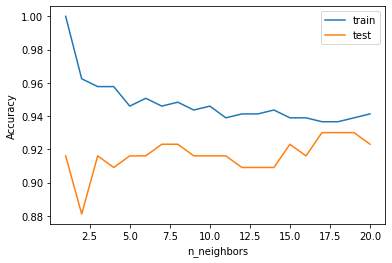

In [ ]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X = pd.DataFrame(cancer['data'])
X.columns = cancer['feature_names']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, cancer.target, stratify=cancer.target, random_state=0)

training_accuracy = []
testing_accuracy = []

for n_neighbors in range (1,21):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, Y_train)
  training_accuracy.append(model.score(X_train, Y_train))
  testing_accuracy.append(model.score(X_test, Y_test))

print(training_accuracy)

plt.plot(range(1,21), training_accuracy, label = 'train')
plt.plot(range(1,21), testing_accuracy, label = 'test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()


Practice_6
1. 研究k-NN如何計算
2. 使用mushroom資料建構k-NN模型
3. 使用學生數學資料，G3為target，['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','absences','G1','G2']為variable


[0.9868701788938126, 0.9868701788938126, 0.9847365829640571, 0.9911373707533235, 0.9911373707533235, 0.9906450024618415, 0.9911373707533235, 0.9906450024618415, 0.9906450024618415, 0.9906450024618415, 0.9906450024618415, 0.9906450024618415, 0.9906450024618415, 0.9906450024618415, 0.9906450024618415, 0.9883472837682586, 0.9883472837682586, 0.9868701788938126, 0.9868701788938126, 0.9835877236172658]


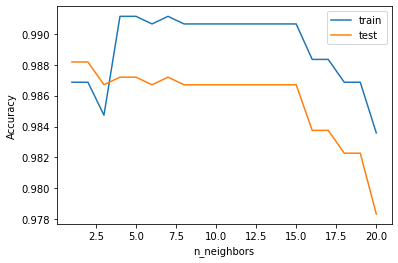

In [ ]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
r = requests.get(url).content
mushroom = pd.read_csv(io.StringIO(r.decode('utf-8')), header =None)
mushroom.columns = ['classes','cap_surface','cap_color','odor','bruises','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_root','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)

X = mushroom_dummy.drop('flg', axis =1)
Y = mushroom_dummy['flg']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=50)

training_accuracy = []
testing_accuracy = []

for n_neighbors in range (1,21):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, Y_train)
  training_accuracy.append(model.score(X_train, Y_train))
  testing_accuracy.append(model.score(X_test, Y_test))

print(training_accuracy)

plt.plot(range(1,21), training_accuracy, label = 'train')
plt.plot(range(1,21), testing_accuracy, label = 'test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

[1.0, 0.6317567567567568, 0.581081081081081, 0.5743243243243243, 0.5574324324324325, 0.5371621621621622, 0.5135135135135135, 0.5101351351351351, 0.5033783783783784, 0.48986486486486486, 0.47297297297297297, 0.4560810810810811, 0.44932432432432434, 0.4594594594594595, 0.44594594594594594, 0.46959459459459457, 0.4560810810810811, 0.46621621621621623, 0.4358108108108108, 0.4358108108108108]


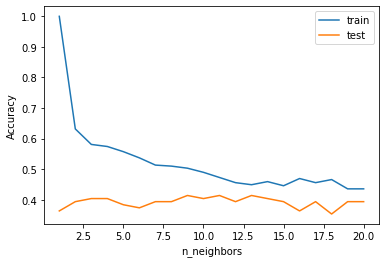

In [ ]:
import requests, zipfile  #接受web資料/讀取zip file
from io import StringIO   
import io                 #讀取檔案
import pandas as pd

url='http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r=requests.get(url, stream=True)

z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
student_data_math=pd.read_csv('student-mat.csv', sep = ';')
X = student_data_math[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','absences','G1','G2']]
Y = student_data_math['G3']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=50)

training_accuracy = []
testing_accuracy = []

for n_neighbors in range (1,21):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, Y_train)
  training_accuracy.append(model.score(X_train, Y_train))
  testing_accuracy.append(model.score(X_test, Y_test))

print(training_accuracy)

plt.plot(range(1,21), training_accuracy, label = 'train')
plt.plot(range(1,21), testing_accuracy, label = 'test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

# 支持向量機(support vector machine, SVM)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X = pd.DataFrame(cancer['data'])
X.columns = cancer['feature_names']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, cancer.target, stratify=cancer.target, random_state=0)

model = LinearSVC()
model.fit(X_train,Y_train)

print('準確度(train):{:.3f}'.format(model.score(X_train, Y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test, Y_test)))

準確度(train):0.923
準確度(test):0.930


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer['data'])
X.columns = cancer['feature_names']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, cancer.target, stratify=cancer.target, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LinearSVC()
model.fit(X_train_std,Y_train)

print('準確度(train):{:.3f}'.format(model.score(X_train_std, Y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test_std, Y_test)))

準確度(train):0.993
準確度(test):0.951


Practice_7
1. 使用model = SVC(kernel='rbf', random_state = 0, C=2)建構預測cancer.target的模型
2. 以iris的data set使用決策樹以iris.data預測iris.target

In [ ]:
from sklearn.svm import SVC

cancer = load_breast_cancer()

X = pd.DataFrame(cancer['data'])
X.columns = cancer['feature_names']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, cancer.target, stratify=cancer.target, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = SVC(kernel='rbf', random_state = 0, C=2)
model.fit(X_train_std,Y_train)

print('準確度(train):{:.3f}'.format(model.score(X_train_std, Y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test_std, Y_test)))

準確度(train):0.995
準確度(test):0.958


準確度(train):1.000
準確度(test):0.974


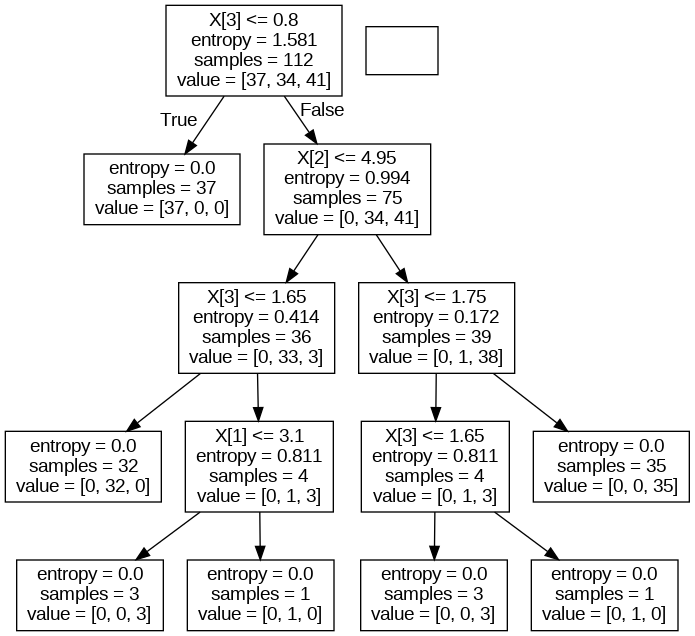

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets
import pydotplus
from six import StringIO
from IPython.display import Image

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = iris['feature_names'] # columns是DataFrame才有的功能
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=0)
model.fit(X_train, Y_train)

print('準確度(train):{:.3f}'.format(model.score(X_train, Y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test, Y_test)))

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
